In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
#read the data

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
from pandas.core.dtypes.common import is_numeric_dtype  #thre others way to make data encoding

In [11]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    df[col]=le.fit_transform(df[col])    

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

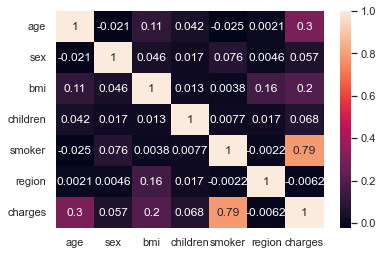

In [13]:
df_corr=df.corr()
sns.heatmap(df_corr, annot=True)

In [14]:
#defining x and y

In [15]:
x=df.drop(['charges'],axis=1)

In [16]:
y=df['charges']

In [17]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [18]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.03, random_state=42)

In [22]:
#fit x and y

In [23]:
le.fit(xtrain,ytrain)

LinearRegression()

In [24]:
y_pred=le.predict(xtest)

In [25]:
y_pred

array([ 9125.02818966,  7145.49447375, 37156.99178439,  9496.426936  ,
       26995.59383483, 10436.43823148,   266.31972205, 16842.85219489,
        1236.64912432, 11244.45957647, 27974.91673488,  9355.23660682,
        5271.90644082, 38396.70993593, 40227.89871536, 37090.13703643,
       15211.10709873, 36044.82988282,  9170.32503737, 31714.38277467,
        3610.44368637,  9816.63497103,  1987.52982252,  7101.37749591,
       11473.72489395, 13046.85177562, 14320.38419687,  6264.14022139,
       10112.97693761,  2002.343447  ,  8993.52478449, 13182.93652494,
        4496.55365407,  3597.88555415,  4111.90202166, 12904.39474788,
        1787.60759757,  8642.80433478, 33581.01458229, 32564.7512065 ,
        3762.22075324])

In [26]:
from sklearn.metrics import r2_score

In [27]:
print(r2_score(ytest,y_pred))

0.8585514374489549


# the other way

In [28]:
le.fit(df[['age','sex','bmi','children','smoker','region']],df.charges)

LinearRegression()

In [29]:
le.predict([[19,0,27,0,1,3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24811.92874461])

In [30]:
le.coef_

array([  257.28807486,  -131.11057962,   332.57013224,   479.36939355,
       23820.43412267,  -353.64001656])

In [31]:
le.intercept_

-11815.45232123138

In [32]:
257.28807486*19-131.11057962*0+332.57013224*27+479.36939355*0+23820.43412267*1-353.64001656*3-11815.45232123138

24811.928744578625